<a href="https://colab.research.google.com/github/frh02/ProjectEEG/blob/master/EEG_Self_SGD_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import numpy as np
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Activation
from keras.layers import Flatten, Dense, Dropout
from matplotlib import pyplot as plt
%matplotlib inline

print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:

img_rows=51
img_cols=51
num_channel=3
num_epoch=50

batch_size=64



In [4]:
import os

import cv2


In [5]:
PATH = os.getcwd()
# Define data path
data_path =  '/content/drive/My Drive/Data_all_compress' #'Train'
data_dir_list = os.listdir(data_path)
data_dir_list

['Anesthesia_Low', 'Anesthesia_Deep', 'Anesthesia_Okay']

In [7]:
num_classes = 3

#labels_name={'Ok':0,'Deep':1,'Light':2}
#class_names=['Ok', 'Light', 'Deep']
class_names=['Anesthesia_Low', 'Anesthesia_Deep','Anesthesia_Okay']
labels_name={'Anesthesia_Low':0,'Anesthesia_Deep':1, 'Anesthesia_Okay':2}
img_data_list=[]
labels_list = []


In [8]:
for d in data_dir_list:
  print(d)
  print(os.listdir(data_path+'/' +d))
    

Anesthesia_Low
['Pat11LOW_1534.png', 'Pat11LOW_1535.png', 'Pat11LOW_1536.png', 'Pat11LOW_1537.png', 'Pat11LOW_1538.png', 'Pat11LOW_1539.png', 'Pat11LOW_1541.png', 'Pat11LOW_1540.png', 'Pat11LOW_1543.png', 'Pat11LOW_1542.png', 'Pat11LOW_1544.png', 'Pat11LOW_1545.png', 'Pat11LOW_1546.png', 'Pat11LOW_1548.png', 'Pat11LOW_1547.png', 'Pat11LOW_1549.png', 'Pat11LOW_1551.png', 'Pat11LOW_1550.png', 'Pat11LOW_1552.png', 'Pat11LOW_1553.png', 'Pat11LOW_1554.png', 'Pat11LOW_1555.png', 'Pat11LOW_1556.png', 'Pat11LOW_1557.png', 'Pat11LOW_1558.png', 'Pat11LOW_1559.png', 'Pat11LOW_1561.png', 'Pat11LOW_1560.png', 'Pat11LOW_1563.png', 'Pat11LOW_1562.png', 'Pat11LOW_1564.png', 'Pat11LOW_1565.png', 'Pat11LOW_1566.png', 'Pat11LOW_1567.png', 'Pat11LOW_1568.png', 'Pat11LOW_1569.png', 'Pat11LOW_1570.png', 'Pat11LOW_1571.png', 'Pat11LOW_1573.png', 'Pat11LOW_1572.png', 'Pat11LOW_1574.png', 'Pat11LOW_1575.png', 'Pat11LOW_1576.png', 'Pat11LOW_1578.png', 'Pat11LOW_1577.png', 'Pat11LOW_1579.png', 'Pat11LOW_1581.png

In [9]:
for dataset in data_dir_list:
  img_list=os.listdir(data_path+'/' +dataset)
  print ('Loading the images of dataset-'+'{}\n'.format(dataset))
  label = labels_name[dataset]
  for img in img_list:
    input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
    input_img_resize=cv2.resize(input_img,(128,128))
    img_data_list.append(input_img_resize)
    labels_list.append(label)
    

Loading the images of dataset-Anesthesia_Low

Loading the images of dataset-Anesthesia_Deep

Loading the images of dataset-Anesthesia_Okay



In [10]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255.
print (img_data.shape)

(7996, 128, 128, 3)


In [11]:
import keras
import keras.utils
from keras import utils as np_utils

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = keras.utils.to_categorical(labels, num_classes)


(array([0, 1, 2]), array([2662, 2672, 2662]))


In [12]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)


In [13]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6396, 128, 128, 3)
(1600, 128, 128, 3)
(6396, 3)
(1600, 3)


In [15]:

def show_random_eg(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    x=x[indices]
    y=y[indices]
    p=p[indices]
    
    plt.figure(figsize=(20,10))
    
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        csfont = {'fontname':'Comic Sans MS'}
        hfont = {'fontname':'Helvetica'}
        col='purple' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        #print(class_names[np.argmax(p[i])])
        
        plt.xlabel(class_names[np.argmax(p[i])],color=col, fontsize=20,**hfont)
    plt.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


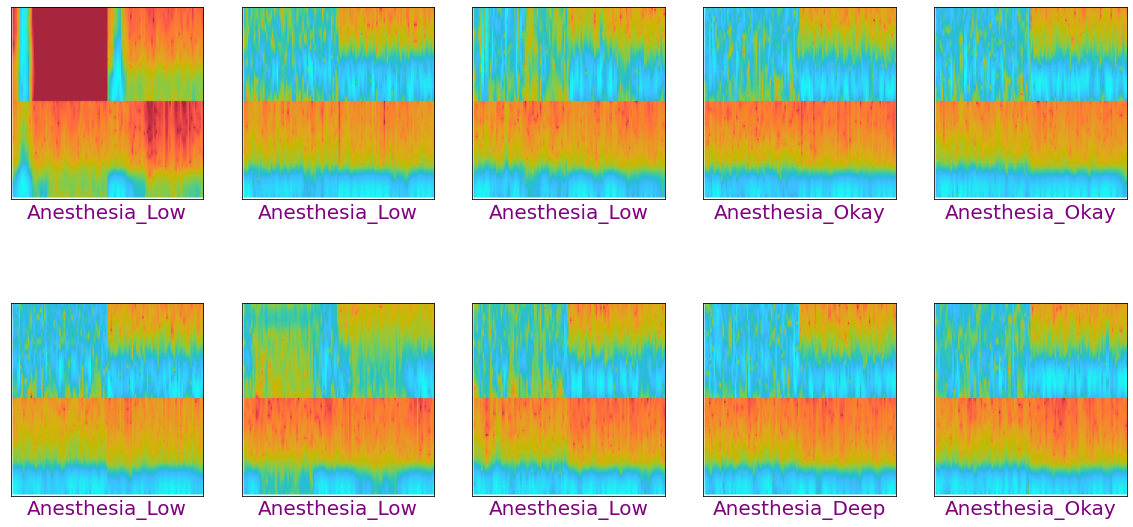

In [16]:
show_random_eg(x_train, y_train, y_train)

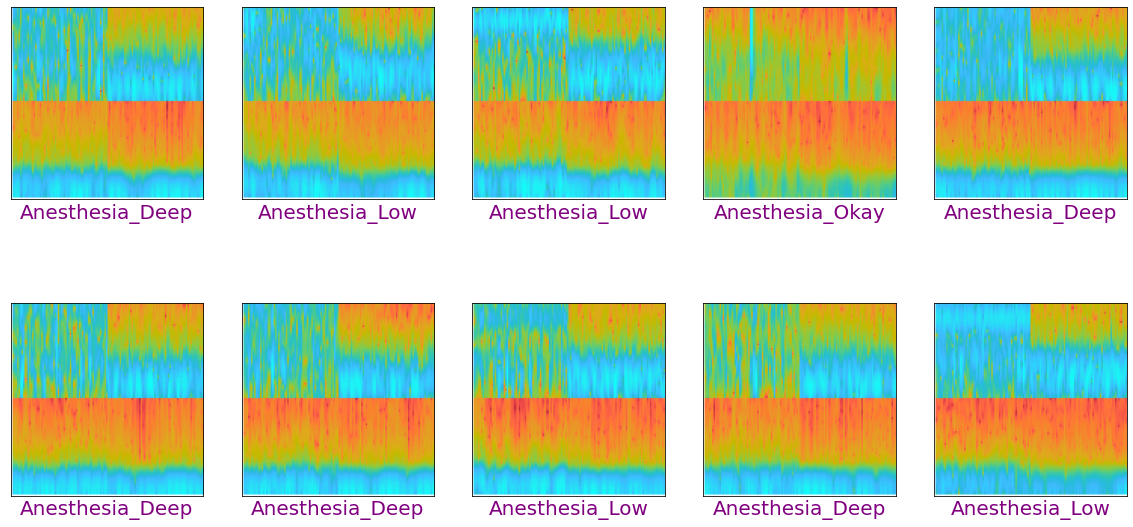

In [17]:
show_random_eg(x_test, y_test, y_test)

In [18]:
input_shape=img_data[0].shape
input_shape

(128, 128, 3)

In [19]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6396, 128, 128, 3) (6396, 3)
(1600, 128, 128, 3) (1600, 3)


# CHECKPOINT

In [20]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

In [21]:
class LearningRateSchedulerPerBatch(LearningRateScheduler):
    """ Callback class to modify the default learning rate scheduler to operate each batch"""
    def __init__(self, schedule, verbose=0):
        super(LearningRateSchedulerPerBatch, self).__init__(schedule, verbose)
        self.count = 0  # Global batch index (the regular batch argument refers to the batch index within the epoch)

    def on_epoch_begin(self, epoch, logs=None):
        pass

    def on_epoch_end(self, epoch, logs=None):
        pass

    def on_batch_begin(self, batch, logs=None):
        super(LearningRateSchedulerPerBatch, self).on_epoch_begin(self.count, logs)

    def on_batch_end(self, batch, logs=None):
        super(LearningRateSchedulerPerBatch, self).on_epoch_end(self.count, logs)
        self.count += 1

In [68]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense ,Activation
from tensorflow.keras.optimizers import Adam

def create_model():
    
    def add_conv_block(model, num_filters):
        
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu', padding='valid'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.2))

        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(128, 128, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model,96)
    model = add_conv_block(model,96)
    model = add_conv_block(model, 128)
    #model = add_conv_block(model,128)
    
    #model = add_conv_block(model, 32)
    
    #model = add_conv_block(model, 64)
    #model = add_conv_block(model,96)
    
    #model = add_conv_block(model, 128)

    
    #model = add_conv_block(model,256)
    
  

    
    model.add(Flatten())
    #model.add(Dense(4096))
    #model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(4096))
    #model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    opt = tf.keras.optimizers.SGD(learning_rate=0.01)
    #opt =SGD(
    #lr=0.001
    #)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='cnn_eeg.png',show_shapes=True, show_layer_names=True)

NameError: ignored

In [33]:
if not os.path.isdir('drive/My Drive/Colab Notebooks/modelsEEG'):
    os.mkdir('drive/My Drive/Colab Notebooks/modelsEEG')


In [69]:
model = create_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_51 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 63, 63, 64)        18496     
_________________________________________________________________
batch_normalization_52 (Batc (None, 63, 63, 64)      

In [72]:
# Start/resume training
#model.fit(x, y, callbacks=callbacks, initial_epoch=initial_epoch)

#Training
h=model.fit(
x_train,y_train,
validation_data=(x_test,y_test),
epochs=80,batch_size=64,
callbacks=[ tf.keras.callbacks.ModelCheckpoint('drive/My Drive/Colab Notebooks/modelsEEG/model_{epoch:03d}_{val_accuracy:.3f}.h5', 
                                            save_best_only=True,
                                            save_weights_only=False,
                                            monitor='val_accuracy')
          ],
initial_epoch=60

)

Epoch 61/80
100/100 [==============================] - 10s 99ms/step - loss: 0.4403 - accuracy: 0.8133 - val_loss: 0.5924 - val_accuracy: 0.7500
Epoch 62/80
100/100 [==============================] - 10s 99ms/step - loss: 0.4366 - accuracy: 0.8104 - val_loss: 0.5795 - val_accuracy: 0.7631
Epoch 63/80
100/100 [==============================] - 10s 99ms/step - loss: 0.4372 - accuracy: 0.8139 - val_loss: 0.5599 - val_accuracy: 0.7613
Epoch 64/80
100/100 [==============================] - 10s 99ms/step - loss: 0.4387 - accuracy: 0.8077 - val_loss: 0.6130 - val_accuracy: 0.7519
Epoch 65/80
100/100 [==============================] - 10s 100ms/step - loss: 0.4305 - accuracy: 0.8121 - val_loss: 0.5522 - val_accuracy: 0.7650
Epoch 66/80
100/100 [==============================] - 10s 100ms/step - loss: 0.4301 - accuracy: 0.8133 - val_loss: 0.6926 - val_accuracy: 0.7400
Epoch 67/80
100/100 [==============================] - 10s 100ms/step - loss: 0.4256 - accuracy: 0.8132 - val_loss: 0.5379 - val

In [73]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/modelsEEG/model_055_0.784.h5')

In [74]:
results = model.evaluate(x_train, y_train, batch_size=64)
print('Train accuracy:', results[1]*100)

100/100 [==============================] - 2s 24ms/step - loss: 0.3985 - accuracy: 0.8285
Train accuracy: 82.84865617752075


In [75]:
results = model.evaluate(x_test, y_test, batch_size=64)
print('Test accuracy:', results[1]*100)

25/25 [==============================] - 1s 25ms/step - loss: 0.4948 - accuracy: 0.7844
Test accuracy: 78.4375011920929


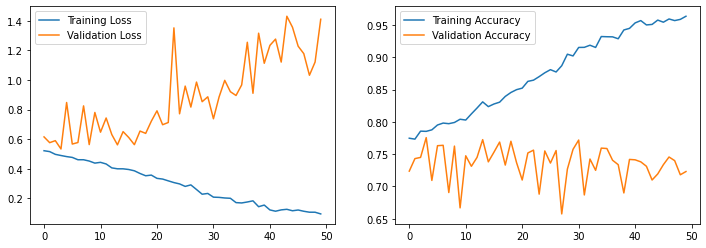

In [51]:
#Final predictions

losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [53]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/modelsEEG/model_014_0.776.h5')
preds = model.predict(x_test)

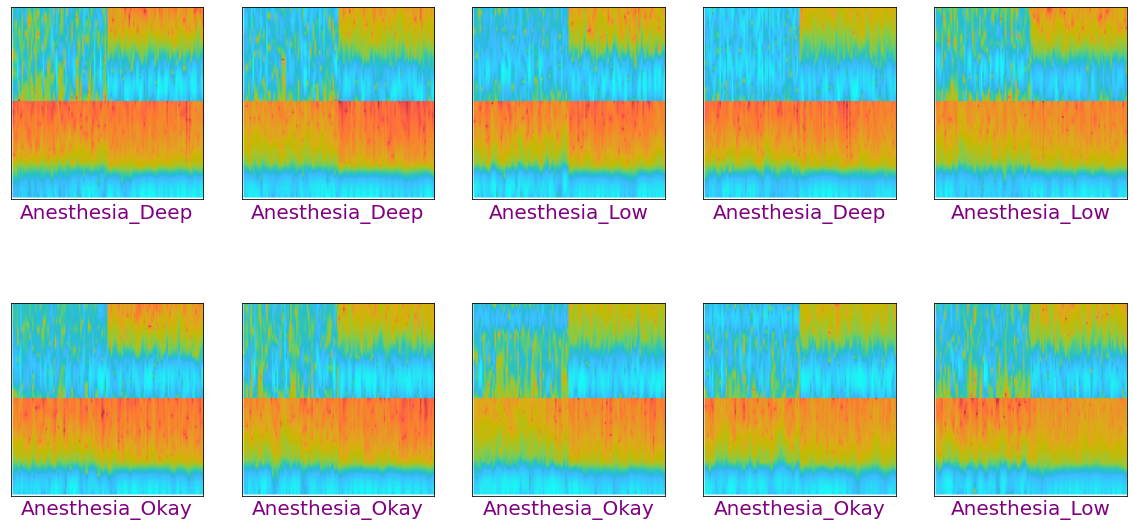

In [54]:
show_random_eg(x_test, y_test, preds)

# jhkhkjh

In [ ]:
# Create model


model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


In [ ]:
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        18496     
__________

True

In [ ]:
# Training
#hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))
hist = model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=num_epoch,verbose=1, validation_split=0.2)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3744 samples, validate on 936 samples
Epoch 1/50
3744/3744 [==============================] - 241s 64ms/step - loss: 1.2156 - acc: 0.5182 - val_loss: 0.9303 - val_acc: 0.6303
Epoch 2/50
3744/3744 [==============================] - 172s 46ms/step - loss: 0.9021 - acc: 0.6114 - val_loss: 0.8906 - val_acc: 0.6485
Epoch 3/50
3744/3744 [==============================] - 168s 45ms/step - loss: 0.8382 - acc: 0.6370 - val_loss: 0.8273 - val_acc: 0.6795
Epoch 4/50
3744/3744 [==============================] - 159s 42ms/step - loss: 0.7751 - acc: 0.6653 - val_loss: 0.7599 - val_acc: 0.6859
Epoch 5/50
3744/3744 [==============================] - 258s 69ms/step - loss: 0.7271 - acc: 0.6763 - val_loss: 0.7813 - val_acc: 0.6848
Epoch 6/50
3744/3744 [==============================] - 178s 47ms/step - loss: 0.7014 - acc: 0.6835 - val_loss: 0.7494 - val_acc: 0.6912
Epoch 7/50
1160/3744 [========>....

In [ ]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [ ]:
# Evaluating the model

score = model.evaluate(X_test, y_test, show_accuracy=True, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

In [ ]:
model.evaluate(X_test, Y_test)[1]